# Problem Statement

**Determining if bank customers subscribe to term deposit or not**

## Features
1) age (numeric)

2) job: type of
job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","selfemployed","services","student","technician","unemployed","unknown")

3) marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"
means divorced or widowed)

4) education: education of individual (categorical:
"basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","u
nknown")

5) default: has credit in default? (categorical: "no","yes","unknown")

6) housing: has housing loan? (categorical: "no","yes","unknown")

7) loan: has personal loan? (categorical: "no","yes","unknown")
Related with the last contact of the current campaign:

8) contact: contact communication type (categorical:"cellular","telephone")

9) month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10) dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11) duration: last contact duration, in seconds (numeric). Important note: this attribute highly
affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known. Thus, this input should only be
included for benchmark purposes and should be discarded if the intention is to have a realistic
predictive model.

12) campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)

13) pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric; 999 means client was not previously contacted)

14) previous: number of contacts performed before this campaign and for this client (numeric)

15) poutcome: outcome of the previous marketing campaign (categorical:
"failure","nonexistent","success")
Social and economic context attributes

16) emp.var.rate: employment variation rate - quarterly indicator (numeric)

17) cons.price.idx: consumer price index - monthly indicator (numeric)

18) cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19) concavepoints_se: standard error for number of concave portions of the contour

20) euribor3m: euribor 3 month rate - daily indicator (numeric)

21) nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):

22) y: has the client subscribed a term deposit? (binary: "yes","no")


## Libraries and options

In [17]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bankdata/bank/bank.csv
/kaggle/input/bankdata/bank/bank-names.txt
/kaggle/input/bankdata/bank/bank-full.csv
/kaggle/input/bankdata/bank-additional/bank-additional/bank-additional.csv
/kaggle/input/bankdata/bank-additional/bank-additional/.Rhistory
/kaggle/input/bankdata/bank-additional/bank-additional/bank-additional-names.txt
/kaggle/input/bankdata/bank-additional/bank-additional/bank-additional-full.csv


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
plt.rcParams['figure.figsize'] = [15,8]

In [21]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

## Loading Data

In [22]:
df = pd.read_csv('/kaggle/input/bankdata/bank/bank-full.csv', sep = ';', na_values = 'None')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [23]:
## As the column names of few columns are complex let's convert it into readable form
df.rename(columns = {'emp.var.rate' : 'EVR', 'cons.price.idx' : 'CPI', 'cons.conf.idx' : 'CCI', 'euribor3m' : 'Euribor',
                     'nr.employed' : 'No_employees', 'y': 'Response'}, inplace = True)

In [24]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Response
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [25]:
df1 = df.copy(deep = True)

## Describing Dataframe

In [26]:
df.shape

(45211, 17)

**Dataframe contains 21 columns with 41188 rows**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Response   45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Checking for duplicates

In [28]:
df.duplicated().any()

False

In [29]:
df[df.duplicated(keep = False)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Response


In [30]:
df.drop_duplicates(inplace = True)

df.shape

(45211, 17)

In [31]:
df.select_dtypes(np.int64).nunique()

age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

##  Describing Summary Statistics

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Question 1

## Checking Correlation between columns

<AxesSubplot:>

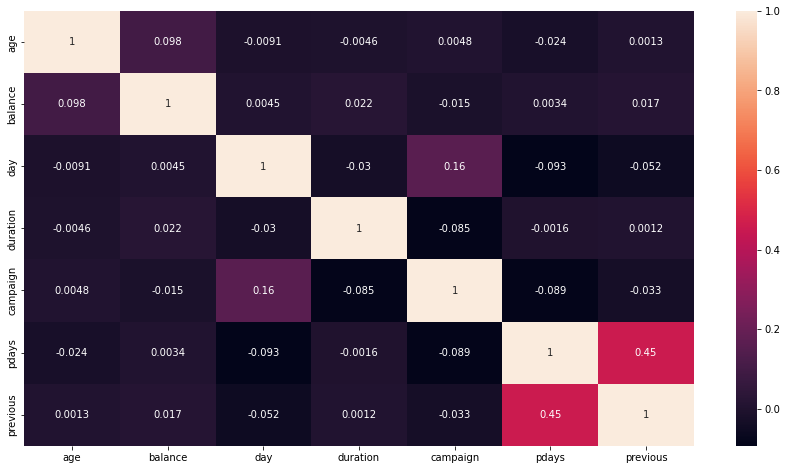

In [33]:
data_corr = df.corr()
sns.heatmap(data = data_corr, annot = True)

## Distinguishing Categorical and numerical columns

In [34]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = [col for col in df.columns if col not in cat_cols]

In [35]:
print('categorical columns :', cat_cols)
print('numerical columns :', num_cols)

categorical columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Response']
numerical columns : ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [36]:
df.select_dtypes(np.object).nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
Response      2
dtype: int64

***From the primary analysis of categorical columns we can observe that there are various unique variables in the categorical columns which have effects on the independent variable that is target column***

# Question 2

## a) Finding Missing values

In [37]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Response     0
dtype: int64

**From the observation we can conclude there are no missing values**

## Cleaning Data

In [38]:
## Replacing 'unknown' as 'others' im job and education columns 
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')

In [39]:
## Changing Target column 'y' to binary
df.Response.replace(('yes','no'), (1, 0), inplace = True)

In [40]:
df.Response.value_counts()

0    39922
1     5289
Name: Response, dtype: int64

In [41]:
## Lets drop contact column as this feature has no use for the required problem
df.drop('contact', axis = 1, inplace = True)

In [42]:
df.shape

(45211, 16)

**We can observe that most columns are linearly related**

## b) Label encoder

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [46]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day', 'poutcome']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [48]:
X = df.drop('Response', axis =1)
y = df['Response']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 1234)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33908, 15), (11303, 15), (33908,), (11303,))

## c) Selecting features by RandomForest

In [51]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_tr_pred = rf_model.predict(X_train)
rf_pred = rf_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
print('RF model R2_score:',r2_score(y_train,rf_tr_pred))
print('RF model rmse:', np.sqrt(mean_squared_error(y_test,rf_pred)))

RF model R2_score: 0.908514967991875
RF model rmse: 0.2583264899743234


In [54]:
df_fea_imp = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), columns = ['cols','imp'])
df_fea_imp.sort_values('imp', ascending = False)

,cols,imp
10,duration,0.295000
5,balance,0.120944
0,age,0.106441
9,month,0.090732
8,day,0.088127
12,pdays,0.065392
14,poutcome,0.059212
1,job,0.044186
11,campaign,0.035427
6,housing,0.026282


## d) SMOTE Analysis

In [55]:
from sklearn.datasets import make_classification
from collections import Counter

In [56]:
from imblearn.over_sampling import SMOTE 

In [57]:
X, y = SMOTE().fit_resample(X, y) 

counter = Counter(y) 
print(counter)

Counter({0: 39922, 1: 39922})


***Choosing features with more than .03 weightage importance***

In [62]:
X1 = df[['duration','age','job','campaign','education','day']] 

In [63]:
X1_train, X1_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 1234)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33908, 15), (11303, 15), (59883,), (19961,))

## e) Scaling 

In [65]:
sc = StandardScaler()
X1_train_scaled = sc.fit_transform(X1_train)
X1_test_scaled = sc.transform(X1_test)

# Quesion 3

## a) Logistic Regression Model

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X1_train_scaled, y_train)
lr_pred = lr.predict(X1_test_scaled)

In [67]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_accuracy

0.8375331897199539

In [68]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84     10031
           1       0.83      0.85      0.84      9930

    accuracy                           0.84     19961
   macro avg       0.84      0.84      0.84     19961
weighted avg       0.84      0.84      0.84     19961



In [69]:
confusion_matrix(y_test, lr_pred)

array([[8245, 1786],
       [1457, 8473]])

In [70]:
cols = ['Model', 'Accuracy']

result_tabulation = pd.DataFrame(columns = cols)

Logistic_regression = pd.Series({'Model': "Logistic Regression",
                     'Accuracy': lr_accuracy})

result_tabulation = result_tabulation.append(Logistic_regression, ignore_index = True)

result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533


## b) ADABoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [72]:
abc = AdaBoostClassifier()

In [73]:
abc.fit(X1_train_scaled, y_train)
abc_pred = abc.predict(X1_test_scaled)

In [74]:
abc_accuracy = accuracy_score(y_test, abc_pred)
abc_accuracy

0.8699463954711688

In [75]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     10031
           1       0.86      0.89      0.87      9930

    accuracy                           0.87     19961
   macro avg       0.87      0.87      0.87     19961
weighted avg       0.87      0.87      0.87     19961



In [76]:
confusion_matrix(y_test, abc_pred)

array([[8574, 1457],
       [1139, 8791]])

In [77]:
ADABoost = pd.Series({'Model': "ADABoost",
                     'Accuracy': abc_accuracy})

result_tabulation = result_tabulation.append(ADABoost, ignore_index = True)

result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533
1,ADABoost,0.869946


## c) Naive bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
gnb = GaussianNB()

In [80]:
gnb.fit(X1_train_scaled, y_train)
gnb_pred = gnb.predict(X1_test_scaled)

In [81]:
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_accuracy

0.7427984569911327

In [82]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     10031
           1       0.67      0.94      0.79      9930

    accuracy                           0.74     19961
   macro avg       0.79      0.74      0.73     19961
weighted avg       0.79      0.74      0.73     19961



In [83]:
confusion_matrix(y_test, gnb_pred)

array([[5452, 4579],
       [ 555, 9375]])

In [84]:
Naive_Bayes = pd.Series({'Model': "Naive Bayes",
                     'Accuracy': gnb_accuracy})

result_tabulation = result_tabulation.append(Naive_Bayes, ignore_index = True)

result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533
1,ADABoost,0.869946
2,Naive Bayes,0.742798


## d) KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)

In [87]:
knn.fit(X, y)
knn_pred = knn.predict(X1_test_scaled)

In [88]:
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_accuracy

0.5025299333700717

In [89]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10031
           1       0.00      0.00      0.00      9930

    accuracy                           0.50     19961
   macro avg       0.25      0.50      0.33     19961
weighted avg       0.25      0.50      0.34     19961



In [90]:
confusion_matrix(y_test, knn_pred)

array([[10031,     0],
       [ 9930,     0]])

In [91]:
KNN = pd.Series({'Model': "K Nearest Neighbours",
                     'Accuracy': knn_accuracy})

result_tabulation = result_tabulation.append(KNN, ignore_index = True)

result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533
1,ADABoost,0.869946
2,Naive Bayes,0.742798
3,K Nearest Neighbours,0.502530


## e) SVM

In [92]:
from sklearn.svm import SVC

In [93]:
svm = SVC()

In [94]:
svm.fit(X1_train_scaled,y_train)

SVC()

In [95]:
svm_pred = svm.predict(X1_test_scaled)

In [96]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_accuracy

0.8767596813786884

In [97]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     10031
           1       0.86      0.90      0.88      9930

    accuracy                           0.88     19961
   macro avg       0.88      0.88      0.88     19961
weighted avg       0.88      0.88      0.88     19961



In [98]:
confusion_matrix(y_test, svm_pred)

array([[8544, 1487],
       [ 973, 8957]])

In [99]:
SVM = pd.Series({'Model': "Support Vector Machine",
                     'Accuracy': svm_accuracy})

result_tabulation = result_tabulation.append(SVM, ignore_index = True)

result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533
1,ADABoost,0.869946
2,Naive Bayes,0.742798
3,K Nearest Neighbours,0.502530
4,Support Vector Machine,0.876760


# Quesion 4

In [100]:
result_tabulation

,Model,Accuracy
0,Logistic Regression,0.837533
1,ADABoost,0.869946
2,Naive Bayes,0.742798
3,K Nearest Neighbours,0.502530
4,Support Vector Machine,0.876760


### From the Observed accuracy we can conclude that SVM with default parameters gives best model with 87.67% accuracy. Whereas K Nearest neighbor model builds worst model with 50.25% Accuracy.